<a href="https://colab.research.google.com/github/krucx/AndrewNg-ML-Course/blob/master/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import imblearn as iml
from sklearn.metrics import roc_curve 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


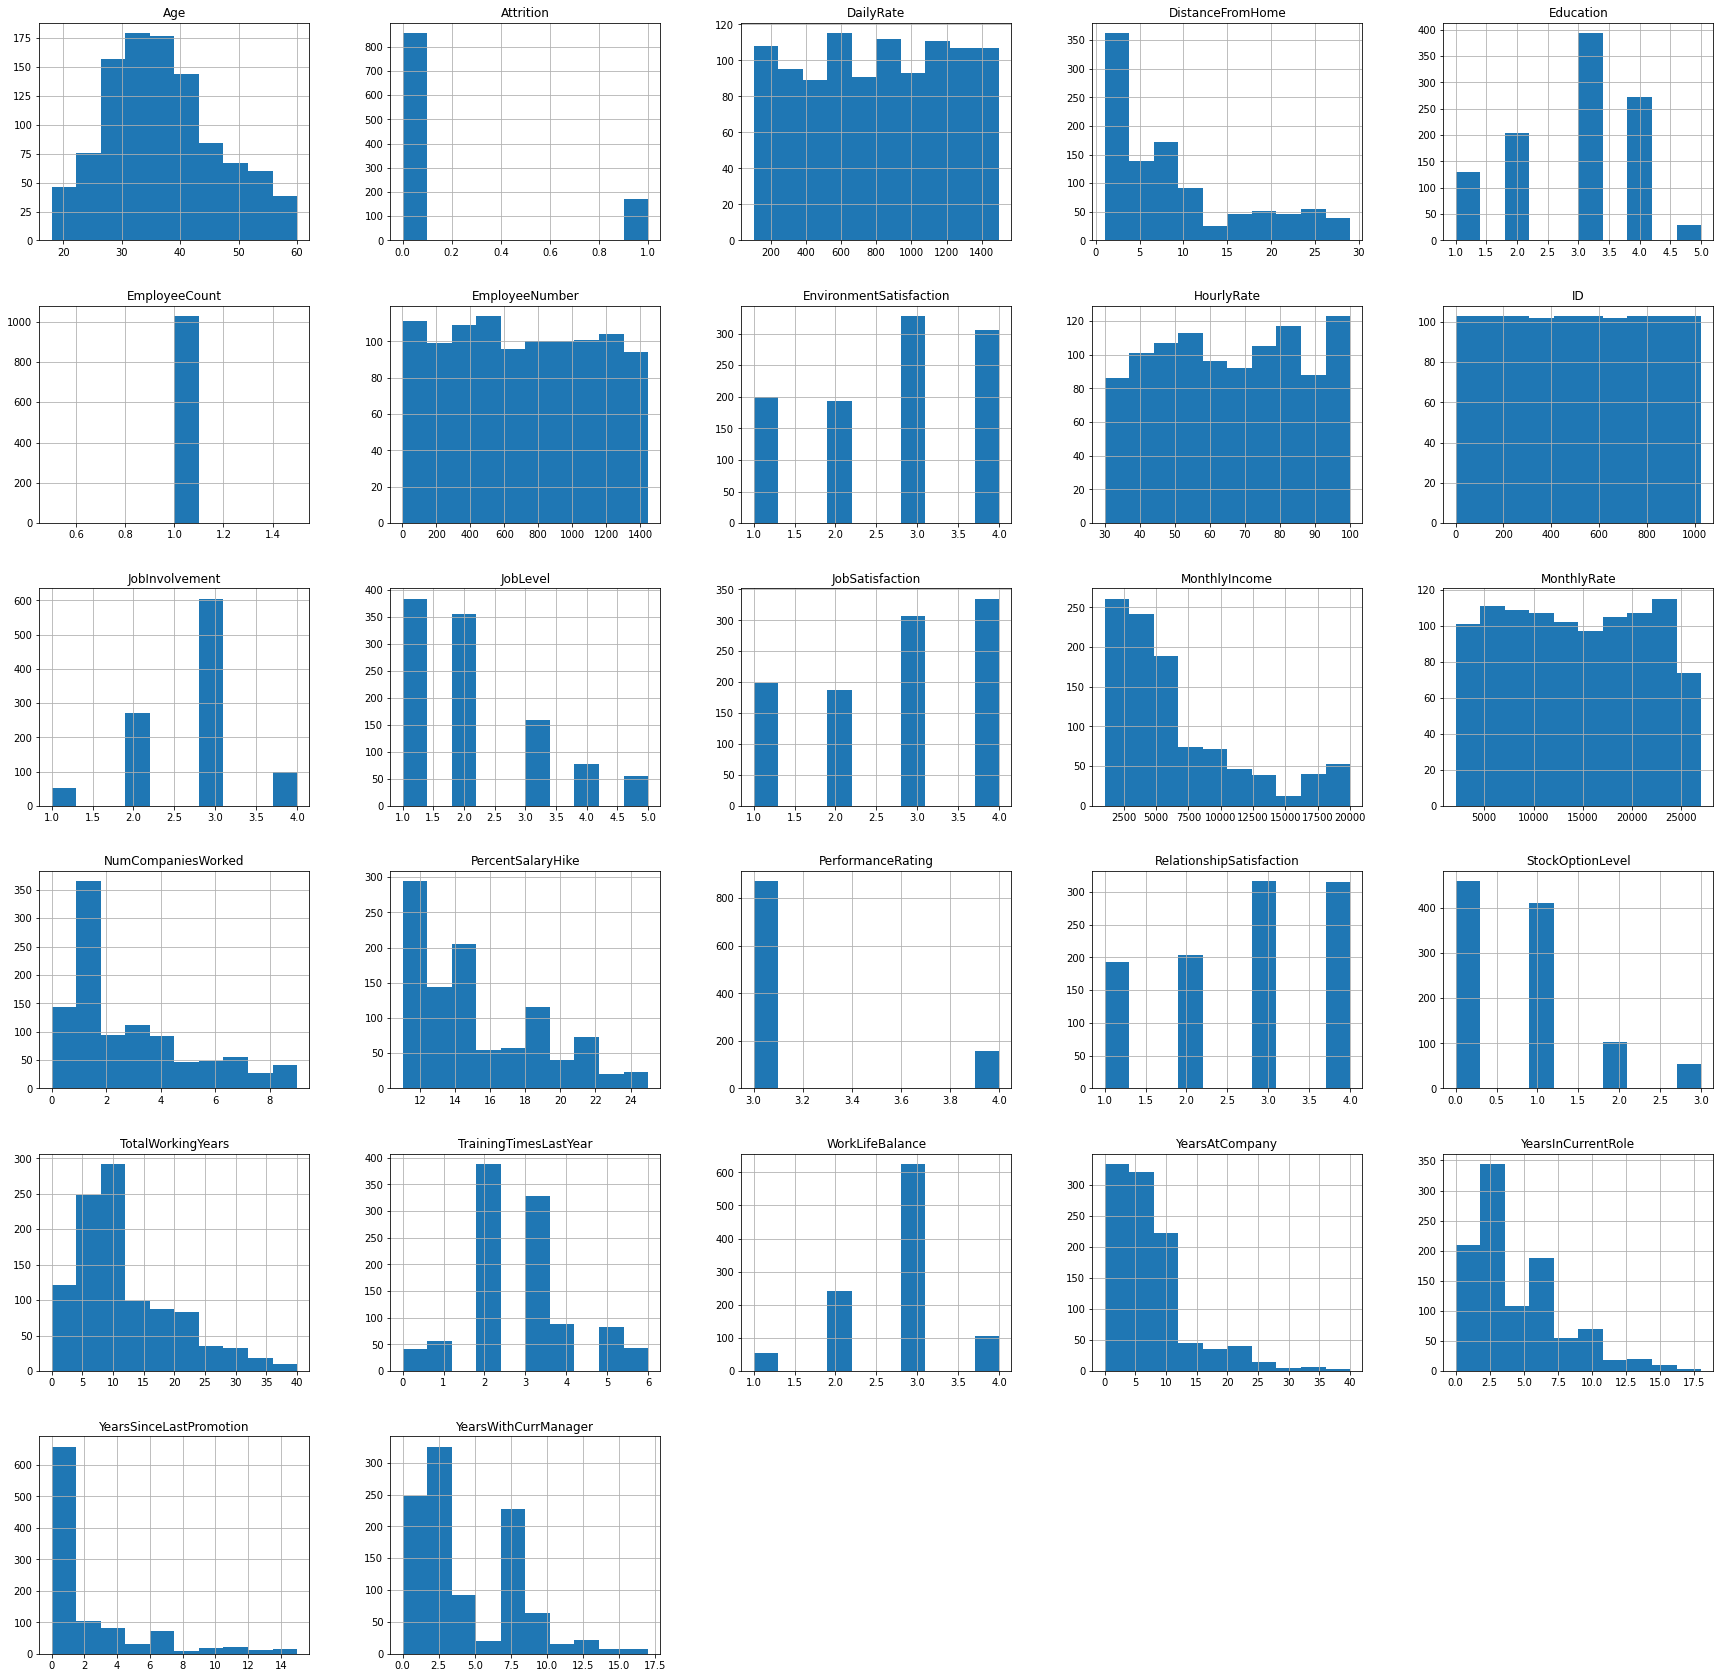

In [4]:
attrition_data.hist(figsize=(30,30))
plt.show()

In [0]:
CategoricalCols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
Encoded = pd.get_dummies(data=attrition_data,columns=CategoricalCols)
X = Encoded.drop(["ID","EmployeeCount","EmployeeNumber","Attrition"],axis=1)
y = (attrition_data.loc[:,'Attrition']).to_numpy()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=111)

In [8]:
rfc = RandomForestClassifier(n_estimators=485, random_state=1111)
rfc.fit(X_train, y_train) 
    
print("The training scores were: {}%".format(round(accuracy_score(y_train, rfc.predict(X_train)), 4)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, rfc.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, rfc.predict(X_test)))
print("="*60)
print(classification_report(y_test, rfc.predict(X_test)))

The training scores were: 100.0%
The testing scores were: 86.41%
[[172   4]
 [ 24   6]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       176
           1       0.60      0.20      0.30        30

    accuracy                           0.86       206
   macro avg       0.74      0.59      0.61       206
weighted avg       0.84      0.86      0.83       206



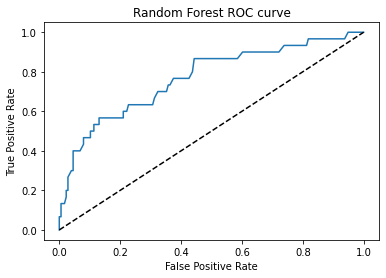

In [9]:
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [17]:
xgbc = XGBClassifier(learning_rate=0.03)

xgbc.fit(X_train, y_train)

print("The training scores were: {}%".format(round(accuracy_score(y_train, xgbc.predict(X_train)), 4)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, xgbc.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, xgbc.predict(X_test)))
print("="*60)
print(classification_report(y_test, xgbc.predict(X_test)))

The training scores were: 88.2%
The testing scores were: 87.86%
[[173   3]
 [ 22   8]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       176
           1       0.73      0.27      0.39        30

    accuracy                           0.88       206
   macro avg       0.81      0.62      0.66       206
weighted avg       0.86      0.88      0.85       206



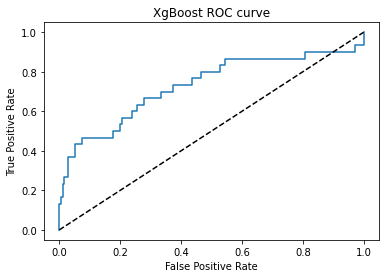

In [18]:
probs = xgbc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XgBoost ROC curve')
plt.show()

In [19]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

print("The training scores were: {}%".format(round(accuracy_score(y_train, dtc.predict(X_train)), 4)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, dtc.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, dtc.predict(X_test)))
print("="*60)
print(classification_report(y_test, dtc.predict(X_test)))

The training scores were: 100.0%
The testing scores were: 79.61%
[[156  20]
 [ 22   8]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       176
           1       0.29      0.27      0.28        30

    accuracy                           0.80       206
   macro avg       0.58      0.58      0.58       206
weighted avg       0.79      0.80      0.79       206



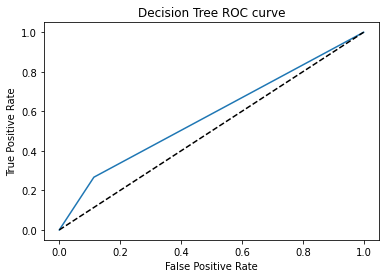

In [20]:
probs = dtc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
plt.show()

In [24]:
ada = AdaBoostClassifier(learning_rate=0.3)

ada.fit(X_train, y_train)

print("The training scores were: {}%".format(round(accuracy_score(y_train, ada.predict(X_train)), 2)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, ada.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, ada.predict(X_test)))
print("="*60)
print(classification_report(y_test, ada.predict(X_test)))

The training scores were: 87.0%
The testing scores were: 89.81%
[[174   2]
 [ 19  11]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       176
           1       0.85      0.37      0.51        30

    accuracy                           0.90       206
   macro avg       0.87      0.68      0.73       206
weighted avg       0.89      0.90      0.88       206



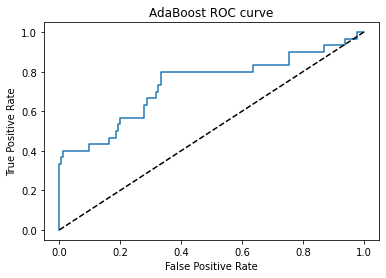

In [25]:
probs = ada.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC curve')
plt.show()

In [26]:
estimator = XGBClassifier(
    objective = 'binary:logistic',
    seed = 42
)

parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(100, 200, 20),
    'learning_rate': [0.03,0.1,0.3,1.0,3]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   41.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:  1.4min finished


({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140},
 0.8220642567371776)

In [27]:
xgbc = grid_search.best_estimator_

xgbc.fit(X_train, y_train)

print("The training scores were: {}%".format(round(accuracy_score(y_train, xgbc.predict(X_train)), 4)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, xgbc.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, xgbc.predict(X_test)))
print("="*60)
print(classification_report(y_test, xgbc.predict(X_test)))

The training scores were: 92.09%
The testing scores were: 85.92%
[[168   8]
 [ 21   9]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       176
           1       0.53      0.30      0.38        30

    accuracy                           0.86       206
   macro avg       0.71      0.63      0.65       206
weighted avg       0.84      0.86      0.84       206



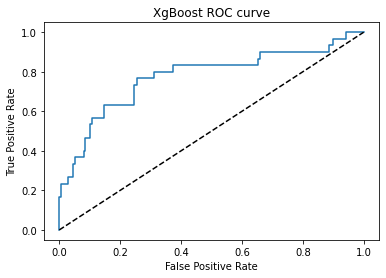

In [28]:
probs = xgbc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XgBoost ROC curve')
plt.show()

In [29]:
estimator = AdaBoostClassifier()

parameters = {
    'n_estimators': range(200, 2000, 400),
    'learning_rate': [0.03,0.1,0.3,1.0,3]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 125 out of 125 | elapsed:  4.3min finished


({'learning_rate': 0.03, 'n_estimators': 1800}, 0.8247392060272384)

In [30]:
ada = grid_search.best_estimator_

ada.fit(X_train, y_train)

print("The training scores were: {}%".format(round(accuracy_score(y_train, ada.predict(X_train)), 4)*100))
print("The testing scores were: {}%".format(round(accuracy_score(y_test, ada.predict(X_test)), 4)*100))

print(confusion_matrix(y_test, ada.predict(X_test)))
print("="*60)
print(classification_report(y_test, ada.predict(X_test)))

The training scores were: 90.39%
The testing scores were: 89.32%
[[172   4]
 [ 18  12]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       176
           1       0.75      0.40      0.52        30

    accuracy                           0.89       206
   macro avg       0.83      0.69      0.73       206
weighted avg       0.88      0.89      0.88       206



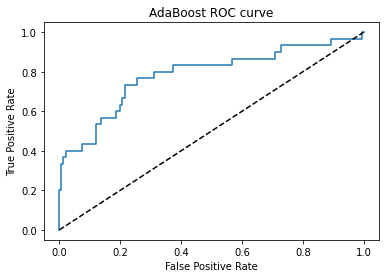

In [31]:
probs = ada.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC curve')
plt.show()

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  